# 숫자 인식

## 라이브러리 로딩 

In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
plt.rc('font', family='D2coding')
%config Completer.use_jedi = False

## 데이터셋 로딩

In [3]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [75]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target
df.sample(frac=1).reset_index(drop=True)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,3.0,12.0,16.0,10.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,5.0,13.0,0.0,0.0,0.0,0.0,7
1,0.0,0.0,7.0,14.0,16.0,11.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,6.0,16.0,12.0,5.0,0.0,0.0,3
2,0.0,0.0,0.0,6.0,16.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7.0,16.0,3.0,0.0,0.0,4
3,0.0,0.0,1.0,12.0,16.0,14.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,12.0,16.0,11.0,1.0,0.0,9
4,0.0,0.0,4.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,13.0,10.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,6.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,6.0,16.0,16.0,16.0,16.0,12.0,1
1793,0.0,0.0,4.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,13.0,16.0,11.0,1.0,0.0,6
1794,0.0,0.0,4.0,16.0,16.0,16.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,13.0,3.0,0.0,0.0,0.0,7
1795,0.0,0.0,8.0,12.0,12.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,5.0,13.0,11.0,4.0,0.0,0.0,0


In [215]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

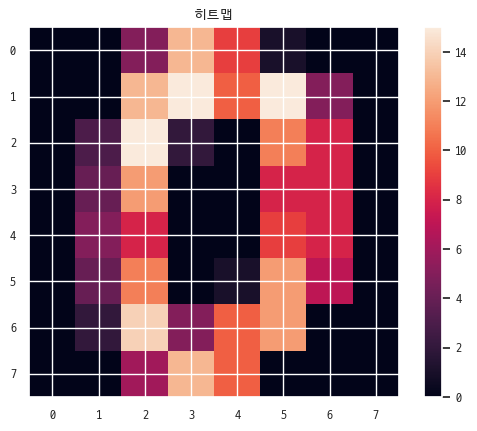

In [87]:
plt.imshow(digits.data[0].reshape(8, 8))
# plt.imshow(dataset.images[0])
plt.colorbar()
plt.title('히트맵')
plt.show()

In [10]:
df.target.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
df.shape

(1797, 65)

## 데이터 분리

In [159]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=0)

In [45]:
X_train.shape

(1437, 64)

## knn 분류 알고리즘

In [235]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='micro')
    recall = recall_score(y_test, pred, average='micro')
    print('오차 행렬')
    print(confusion)
    print('정확도: {}, 정밀도: {}, 재현율: {}'.format(accuracy, precision, recall))

In [218]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print(kn.score(X_train, y_train))
print(kn.score(X_test, y_test))

0.9902574808629089
0.975


(array([0], dtype=int64),)


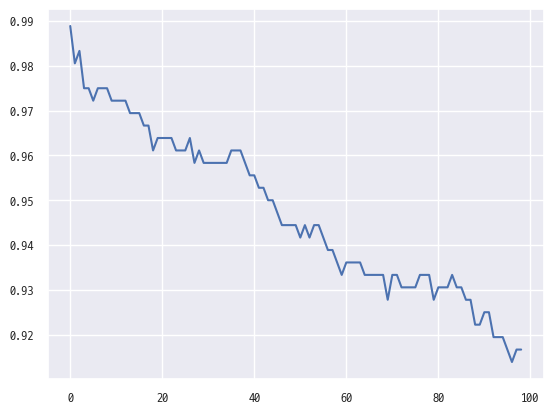

In [219]:
# 1 ~ 100
ks = 100
mean_acc = np.zeros((ks-1))
for k in range(1, ks):
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[k-1] = accuracy_score(y_test, yhat)

print(np.where(mean_acc == mean_acc.max()))
plt.plot(mean_acc)
plt.show()

### 최적 k값찾기

### 교차행렬(CV)

In [220]:
model = KNeighborsClassifier()

params = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

gs = GridSearchCV(model, param_grid=params, cv=5, refit=True, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [221]:
print(gs.best_params_)

{'n_neighbors': 3}


In [222]:
print(gs.best_score_)

0.98677651955091


In [223]:
np.max(gs.cv_results_['mean_test_score'])

0.98677651955091

In [224]:
# 최적의 모델일 때 테스트 값 넣었을때 정확도
model = gs.best_estimator_
pred_y = model.predict(X_test)
accuracy_score(y_test, pred_y)

0.9833333333333333

In [236]:
get_clf_eval(y_test, pred_y)

오차 행렬
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  1  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  2  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  0 41]]
정확도: 0.9833333333333333, 정밀도: 0.9833333333333333, 재현율: 0.9833333333333333


## knn 회귀 알고리즘

In [197]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train)
print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

0.9824572691586243
0.977119774340421


### 최적 k값 찾기

(array([1], dtype=int64),)


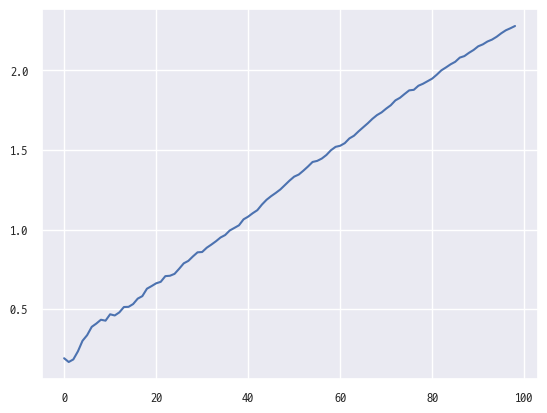

In [136]:
# 1 ~ 100
ks = 100
mean_acc = np.zeros((ks-1))
for k in range(1, ks):
    clf = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[k-1] = mean_squared_error(y_test, yhat)

print(np.where(mean_acc == mean_acc.min()))
plt.plot(mean_acc)
plt.show()

### 교차행렬

In [199]:
model = KNeighborsRegressor()

params = {
    'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

gs = GridSearchCV(model, param_grid=params, cv=5, refit=True, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [200]:
print(gs.best_params_)

{'n_neighbors': 3}


In [201]:
print(gs.best_score_)

0.9627665270731607


In [202]:
np.max(gs.cv_results_['mean_test_score'])

0.9627665270731607

In [203]:
# 최적의 모델을 사용했을때 정확도
model = gs.best_estimator_
print(model.score(X_test, y_test))

0.977119774340421
